In [1]:
import geopandas as gpd #handle shape file 
import matplotlib.pyplot as plt #Make graph

import numpy as np #Mathematical functions
import pandas as pd #

from shapely import wkt
#import geopy.distance
from math import radians, cos, sin, asin, sqrt

from pandas.core.frame import DataFrame
from functools import reduce
import pyproj as pp
from pyproj import Proj


from pylab import rcParams 
rcParams['figure.figsize'] = 15,15

import warnings
warnings.filterwarnings('ignore')

In [18]:
#Parroquias Urbanas de Quito 
# This shape file was cleaned in the part 1. 

df_uquito= gpd.read_file('../data/Quito Urbano/Quito_Urbano.shp')
df_MIES= gpd.read_file('../data/MIES points/MIES_points.shp')
df_pd= gpd.read_file('../data/Puntos Digitales/Sierra.shp')

In [19]:
df_pd = df_pd.set_crs(4326, allow_override=True) 

In [20]:
df_Centros_MIES = gpd.sjoin(df_pd,df_uquito,how='left')


In [21]:
df_Centros_MIES

,Name,descr_tion,timestamp,begin,end,altit_Mode,tessellate,extrude,visibility,drawOrder,...,PARROQUIA,DIRECCI__N,LATITUD,LONGITUD,geometry,index_right,id,dpa_parroq,dpa_despar,Urbana
0,LA UNIÃN,CÃDIGO: AZU-I-001<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,LA UNIÃN,"VÃA LA UNIÃN, FRENTE AL GAD PARROQUIAL, ANTE...",-2.9245990,-78.7622710,POINT (-78.76227 -2.92460),NaN,NaN,NaN,NaN,NaN
1,DELEGSOL,CÃDIGO: AZU-I-002<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,LUIS GALARZA ORELLANA (CAB. EN DELEGSOL),VÃA PRINCIPAL Y CALLE JOAQUÃN MARTÃNEZ CENT...,-2.9971300,-78.7639290,POINT (-78.76393 -2.99713),NaN,NaN,NaN,NaN,NaN
2,PRINCIPAL,CÃDIGO: AZU-I-003<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,PRINCIPAL,CALLE LUIS CORDERO Y GUALACEO ESQUINA,-3.0254940,-78.7527990,POINT (-78.75280 -3.02549),NaN,NaN,NaN,NaN,NaN
3,SAN MARTÃN DE PUZHIO,CÃDIGO: AZU-I-004<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,SAN MARTÃN DE PUZHIO,AVENIDA SAN MARTIN- COLISEO SALVADOR MACAO,-2.9854800,-78.7586330,POINT (-78.75863 -2.98548),NaN,NaN,NaN,NaN,NaN
4,SAN GABRIEL,CÃDIGO: AZU-I-005<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,CHAUCHA,"VÃA CUENCA - IBERIA KM 100, JUNTO AL GAD DE L...",-2.9129000,-79.4328660,POINT (-79.43287 -2.91290),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,QUINCHICOTO,CÃDIGO: TUN-I-030<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,QUINCHICOTO,CALLE 27 DE FEBRERO Y FRANCISCO ROSERO,-1.3867040,-78.6577870,POINT (-78.65779 -1.38670),NaN,NaN,NaN,NaN,NaN
434,TISALEO,CÃDIGO: TUN-I-031<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,TISALEO,17 DE NOVIEMBRE Y CACIQUE TISALEO,-1.3489900,-78.6695260,POINT (-78.66953 -1.34899),NaN,NaN,NaN,NaN,NaN
435,BAÃOS,CÃDIGO: TUN-M-001<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,BAÃOS DE AGUA SANTA,12 DE NOVIEMBRE Y VICENTE ROCAFUERTE,-1.3965577,-78.4235913,POINT (-78.42359 -1.39656),NaN,NaN,NaN,NaN,NaN
436,CEVALLOS,CÃDIGO: TUN-M-002<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,CEVALLOS,"EUSEBIO SÃNCHEZ Y, CORINA SÃNCHEZ, CEVALLOS",-1.3580700,-78.6163110,POINT (-78.61631 -1.35807),NaN,NaN,NaN,NaN,NaN


In [22]:
df_Centros_MIES.dropna(subset=['dpa_parroq'], inplace = True )


In [23]:
df_Centros_MIES

,Name,descr_tion,timestamp,begin,end,altit_Mode,tessellate,extrude,visibility,drawOrder,...,PARROQUIA,DIRECCI__N,LATITUD,LONGITUD,geometry,index_right,id,dpa_parroq,dpa_despar,Urbana
360,CARCELÃN BAJO,CÃDIGO: PIC-I-017<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,CARCELÃN,"CALLE H/E8ESQ PB01,CALLE B N92",-0.0745110,-78.4618500,POINT (-78.46185 -0.07451),30.0,52.0,170102,CARCELEN,Urbano
395,HUARCAY,CÃDIGO: PIC-I-052<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,CHILLOGALLO,"OSWALDO HURTADO, URBANIZACIÃN SAN FRANCISCO D...",-0.2940640,-78.5724200,POINT (-78.57242 -0.29406),3.0,4.0,170108,CHILLOGALLO,Urbano
396,COLINAS DEL NORTE,CÃDIGO: PIC-M-002<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,EL CONDADO,CALLE N79-BARRIO COLINAS DEL NORTE,-0.0945990,-78.5021320,POINT (-78.50213 -0.09460),22.0,43.0,170110,EL CONDADO,Urbano
398,SAN MARTÃN DE PORRES,CÃDIGO: PIC-M-004<br>REGIÃN: SIERRA<br>PROVI...,NaN,NaN,NaN,NaN,-1.0,0.0,-1.0,NaN,...,QUITUMBE,BARRIO SAN MARTIN DE PORRES CALLE E8G -S36-E8,-0.2997300,-78.5245600,POINT (-78.52456 -0.29973),2.0,3.0,170126,QUITUMBE,Urbano


<Axes: >

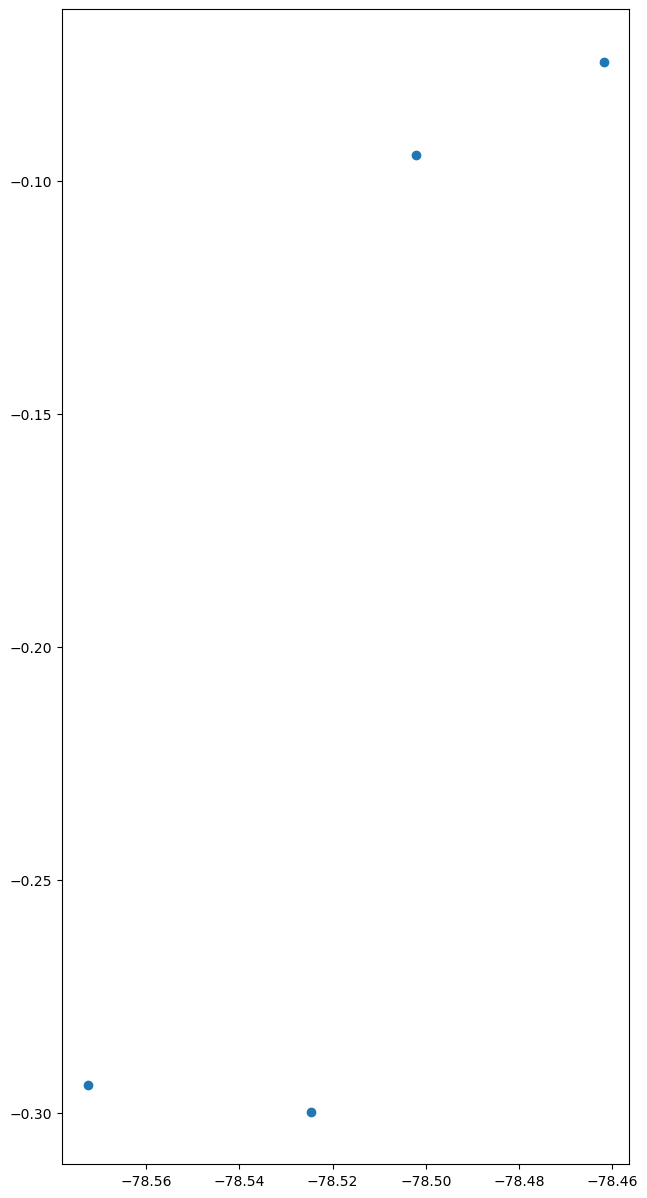

In [24]:
df_Centros_MIES.plot()

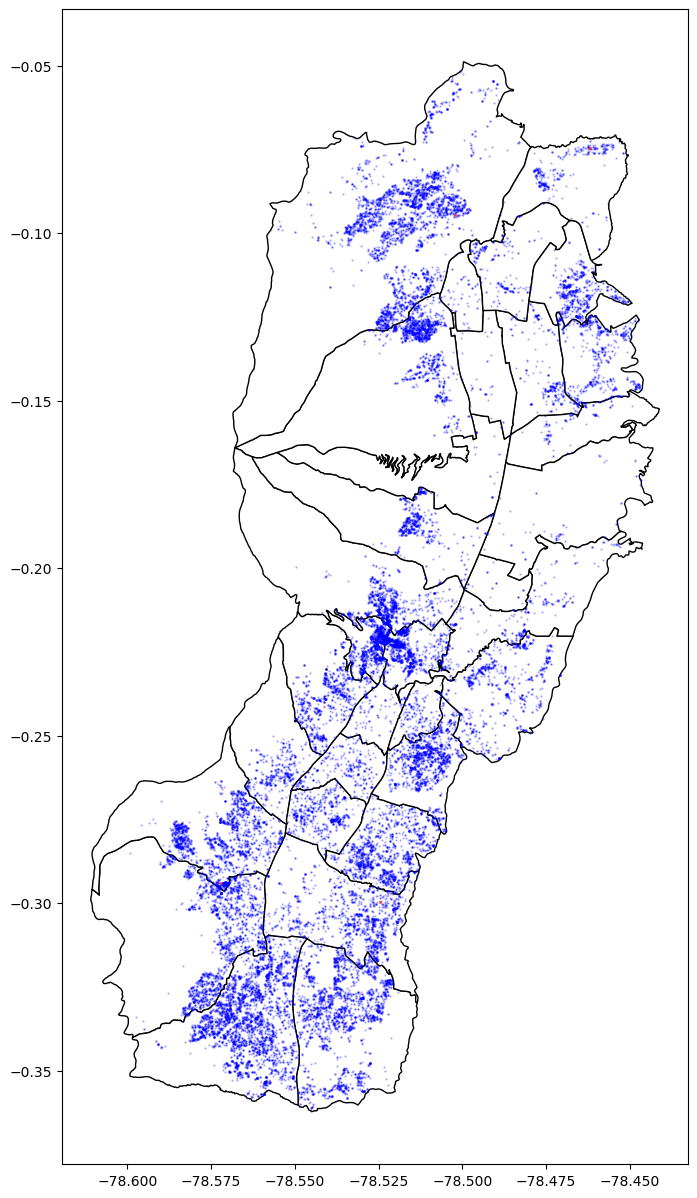

In [26]:


fig, ax = plt.subplots()

ax.set_aspect('equal')

df_uquito.plot(ax=ax, color='white', edgecolor='black')
df_MIES.plot(ax=ax, marker='o', color='blue', markersize=0.5, alpha=0.25)
df_Centros_MIES.plot(ax=ax, marker='o', color='red', markersize=2, alpha=0.5)
plt.show()


In [27]:
df_Centros_MIES2=df_Centros_MIES.set_crs(32717, allow_override=True) 
df_MIES2=df_MIES.set_crs(32717, allow_override=True) 

In [28]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    """
    Calcula la distancia en kilómetros entre dos puntos definidos por sus coordenadas
    latitud y longitud utilizando la fórmula del haversine.
    """
    # Radio de la Tierra en kilómetros
    R = 6371.0

    # Convertir coordenadas de grados a radianes
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Diferencia de latitud y longitud
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Aplicar la fórmula del haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distancia = R * c

    return distancia

# Calcular la distancia en kilómetros entre los puntos de hogares y los centros
distancias_km = []
for hogar in df_MIES2.itertuples():
    min_dist_km = float('inf')
    for centro in df_Centros_MIES2.itertuples():
        dist_km = haversine(hogar.geometry.y, hogar.geometry.x, centro.geometry.y, centro.geometry.x)
        if dist_km < min_dist_km:
            min_dist_km = dist_km
    distancias_km.append(min_dist_km)

# Agregar la distancia en kilómetros a los puntos de hogares
df_MIES2["distancia_km"] = distancias_km



In [29]:
df_MIES2.distancia_km.mean()

4.573943448228769

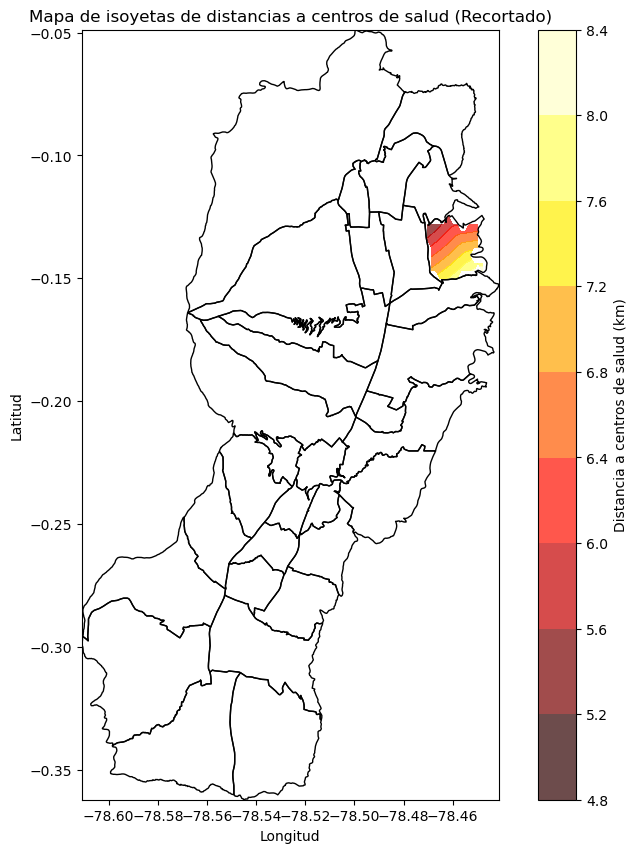

In [35]:
from matplotlib.path import Path
from scipy.interpolate import griddata

# Obtener los límites de los polígonos
x_min, y_min, x_max, y_max = df_uquito.total_bounds

# Crear una cuadrícula que se ajuste a los límites de los polígonos
resolucion = 100

x = np.linspace(x_min, x_max, resolucion)
y = np.linspace(y_min, y_max, resolucion)
X, Y = np.meshgrid(x, y)


# Crear una lista para almacenar las máscaras de recorte de cada polígono de barrios
barrios_masks = []


# Crear una cuadrícula que se ajuste a los límites de los polígonos
x = np.linspace(x_min, x_max, resolucion)
y = np.linspace(y_min, y_max, resolucion)
X, Y = np.meshgrid(x, y)


# Iterar sobre los polígonos de los barrios y crear una máscara de recorte para cada uno
for polygon in df_uquito.geometry:
    barrios_masks.append(Path(polygon.exterior.coords))

# Interpolar las distancias desde los puntos de hogares a la cuadrícula regular
distancias_interpoladas = griddata((df_MIES2.geometry.x, df_MIES2.geometry.y), distancias_km, (X, Y), method='linear')

# Crear una matriz para almacenar las isoyetas recortadas para cada polígono de barrios
isoyetas_recortadas = np.zeros_like(distancias_interpoladas)

# Recorrer todas las máscaras de recorte y recortar las isoyetas
for mask in barrios_masks:
    isoyetas_recortadas = np.where(mask.contains_points(np.vstack((X.flatten(), Y.flatten())).T).reshape(X.shape), distancias_interpoladas, np.nan)

# Graficar el mapa de isoyetas recortadas
plt.figure(figsize=(10, 10))
plt.contourf(X, Y, isoyetas_recortadas, cmap='hot', alpha=0.7)
plt.colorbar(label='Distancia a centros de salud (km)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de isoyetas de distancias a centros de salud (Recortado)')
plt.gca().set_aspect('equal', adjustable='box')

# Graficar los polígonos sobre el mapa de isoyetas recortadas
df_uquito.plot(ax=plt.gca(), facecolor='none', edgecolor='black')

plt.show()

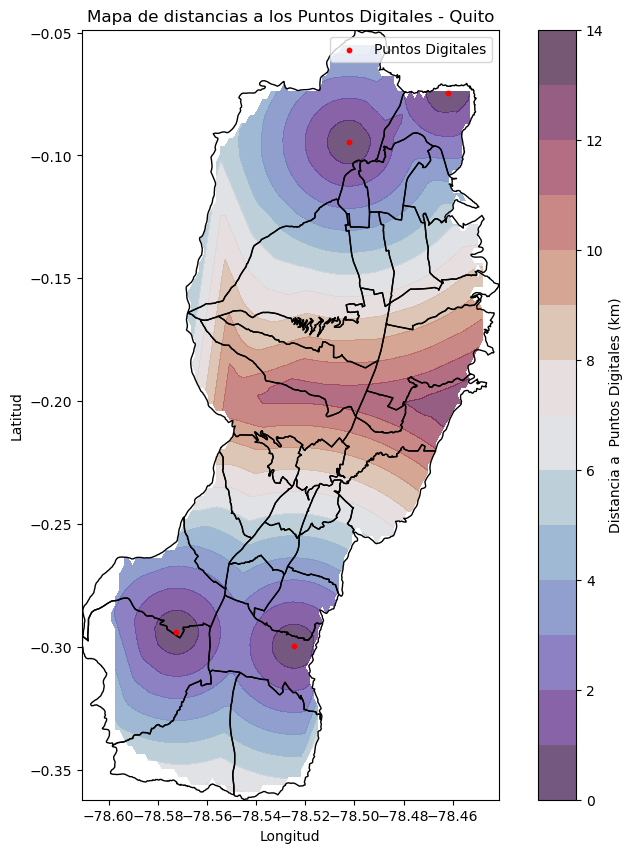

In [50]:
from matplotlib.path import Path

# Crear una máscara compuesta de todos los polígonos de los barrios
barrios_mask = np.zeros_like(X, dtype=bool)
for polygon in df_uquito.geometry:
    barrios_mask |= Path(polygon.exterior.coords).contains_points(np.vstack((X.flatten(), Y.flatten())).T).reshape(X.shape)

# Determinar los intervalos de las isoyetas en intervalos de 1 km
intervalos_isoyetas = np.arange(0, 15, 1)  # Por ejemplo, de 0 a 10 km con intervalos de 1 km

# Crear las isoyetas recortadas usando la máscara de los barrios
isoyetas_recortadas = np.where(barrios_mask, distancias_interpoladas, np.nan)

# Graficar el mapa de isoyetas recortadas
plt.figure(figsize=(10, 10))
plt.contourf(X, Y, isoyetas_recortadas, levels=intervalos_isoyetas, cmap='twilight_shifted', alpha=0.7)

plt.colorbar(label='Distancia a  Puntos Digitales (km)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de distancias a los Puntos Digitales - Quito')

# Graficar los polígonos de los barrios
df_uquito.plot(ax=plt.gca(), facecolor='none', edgecolor='black')

# Graficar los puntos de hogares y centros de salud
#df_MIES2.plot(ax=plt.gca(), color='blue', markersize=5, label='Beneficiarios MIES',alpha=0.2)
df_Centros_MIES2.plot(ax=plt.gca(), color='red', markersize=10, label='Puntos Digitales')

plt.legend()

plt.show()